In [19]:
from mnist_read import load_mnist
import numpy as np

In [34]:
mnist = load_mnist(shuffle = True, one_hot = False)

Reading from saved pickle..
 - train-images shape :  (60000, 28, 28, 1)
 - test-images shape :  (10000, 28, 28, 1)
Load option.
 - normalize :  True
 - flatten :  False
 - one-hot coding :  False
 - shuffled :  True
Dataset columns.
 -  train_img
 -  train_label
 -  test_img
 -  test_label


In [35]:
mnist['test_label'][:3]

array([2, 4, 1], dtype=uint8)

In [38]:
# binary classifier
binary_train_5 = (mnist['train_label'] == 5)
binary_test_5 = (mnist['test_label'] == 5)


In [68]:
np.bincount(binary_train_5)
binary_train_5[:100]

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [46]:
# SGDclassifier
from sklearn.linear_model import SGDClassifier
reshaped_train = mnist['train_img'].reshape([-1, 784])

In [94]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [95]:
sgd_clf = SGDClassifier(max_iter = 5, random_state = 42)
sgd_clf.fit(reshaped_train, binary_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [71]:
sgd_clf.predict([reshaped_train[9]])

array([ True])

In [60]:
import matplotlib.pyplot as plt


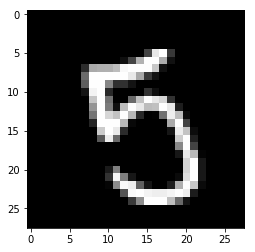

In [70]:
plt.imshow(mnist['train_img'][9].squeeze(2), cmap = 'gray')

In [96]:
## validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, reshaped_train, binary_train_5, cv=3, scoring='accuracy')

array([0.96050197, 0.96675   , 0.97234862])

In [74]:
## confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [97]:
y_train_pred = cross_val_predict(sgd_clf, reshaped_train, binary_train_5, cv=3)

In [77]:
reshaped_test = mnist['test_img'].reshape([-1, 784])
confusion_matrix(binary_train_5, y_train_pred)

array([[53907,   694],
       [ 1314,  4085]], dtype=int64)

In [78]:
#trainset = [binary_train_5, y_train_pred]

In [80]:
## confusion matrix
# [TN, FP]
# [FN, TP]
# precision = TP / TP + FP
# recall = TP / TP + FN
from sklearn.metrics import precision_score, recall_score
print(precision_score(binary_train_5, y_train_pred))
print(recall_score(binary_train_5, y_train_pred))

0.8547813350073237
0.7566215965919615


In [81]:
## f1 score(harmonic mean)
# 2 x precision * recall / (precision + recall) = TP / (TP + ( (FN+FP) / 2))
from sklearn.metrics import f1_score
f1_score(binary_train_5, y_train_pred)

0.8027117311849087

#### F-1 score(harmonic mean) ####
$$ 2 \times \frac{precision \times recall}{precision + recall} = \frac{TP}{TP + \frac{FN+FP}{2}} $$

#### F-n score ####
$$ F = \frac {1}{ \frac{\alpha}{precision} + \frac{(1- \alpha)}{recall} } 
= ( \beta^2 + 1) \times \frac{precision \times recall}{( \beta^2 \times precision + recall )}, \beta^2 = \frac{( 1 -\alpha )}{\alpha} $$

In [89]:
## decision fuction
y_score = sgd_clf.decision_function([reshaped_train[9]])
print(y_score)

[4.41459583]


In [93]:
threshold = 2000
y_some_digit_pred = (y_score > threshold)
print(y_some_digit_pred)

[False]


In [98]:
y_scores = cross_val_predict(sgd_clf, reshaped_train, binary_train_5, cv=3, method='decision_function')

In [99]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(binary_train_5, y_scores)

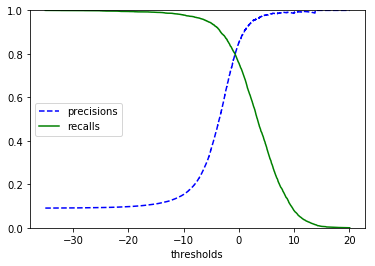

In [100]:
def _graph(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'precisions')
    plt.plot(thresholds, recalls[:-1], 'g-', label = "recalls")
    plt.xlabel("thresholds")
    plt.legend(loc='center left')
    plt.ylim([0, 1])
    plt.show()
_graph(precisions, recalls, thresholds)